In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras import layers
import matplotlib.pyplot as plt

# every file works, only the data distribution changes accordingly
df = pd.read_csv('fd01-sample1.csv')
# df = pd.read_csv('fd01-sample2.csv')
# df = pd.read_csv('fd02-sample1.csv')
# df = pd.read_csv('fd02-sample2.csv')

# split into train and test dataset
x_train, x_test = train_test_split(df, test_size=0.2)
print(x_train.shape, x_test.shape)

y = x_train.Class
x_train.drop(['Class'], axis=1)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing

# The following 2 scalers both work with the same accuracy
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x_train)
# xt = scaler.transform(x_test)
# scaler = StandardScaler()
# x = scaler.fit_transform(x_train)
# xt = scaler.transform(x_test)
x = preprocessing.normalize(x_train)
xt = preprocessing.normalize(x_test)

model = keras.Sequential()
model.add(layers.Input((30, )))
# model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))
# model.add(layers.Dropout(0.5))  # without dropping out, it will overfit
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))  # without dropping out, it will overfit
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # without dropping out, it will overfit
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dropout(0.5))  # without dropping out, it will overfit
model.add(layers.Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.compile(optimizer='sgd', loss='mse', metrics=[keras.metrics.BinaryAccuracy])

model.summary()

(800, 30) (200, 30)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5591 - loss: 9.9009 - val_accuracy: 0.5000 - val_loss: 4.2899
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 10.3816 - val_accuracy: 0.5500 - val_loss: 3.8249
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5512 - loss: 10.3623 - val_accuracy: 0.6125 - val_loss: 3.4120
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5807 - loss: 8.9655 - val_accuracy: 0.6625 - val_loss: 3.0052
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5736 - loss: 9.0257 - val_accuracy: 0.7125 - val_loss: 2.6527
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5838 - loss: 7.6183 - val_accuracy: 0.7125 - val_loss: 2.3628
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 6.2066 - val_accuracy: 0.7625 - val_loss: 2.0948
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 8.3390 - val_accuracy: 0.7500 - val_loss: 1.85

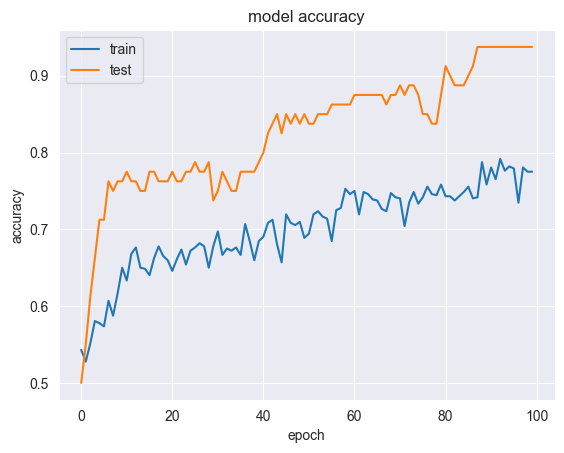

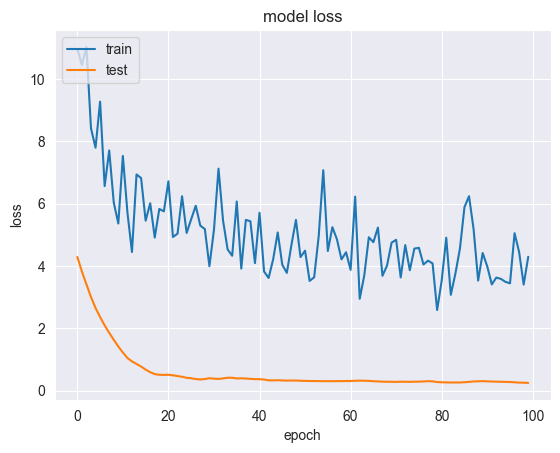

In [24]:
batch_size = 100
epochs = 100

history = model.fit(x_train, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[108   0]
 [ 45  47]]


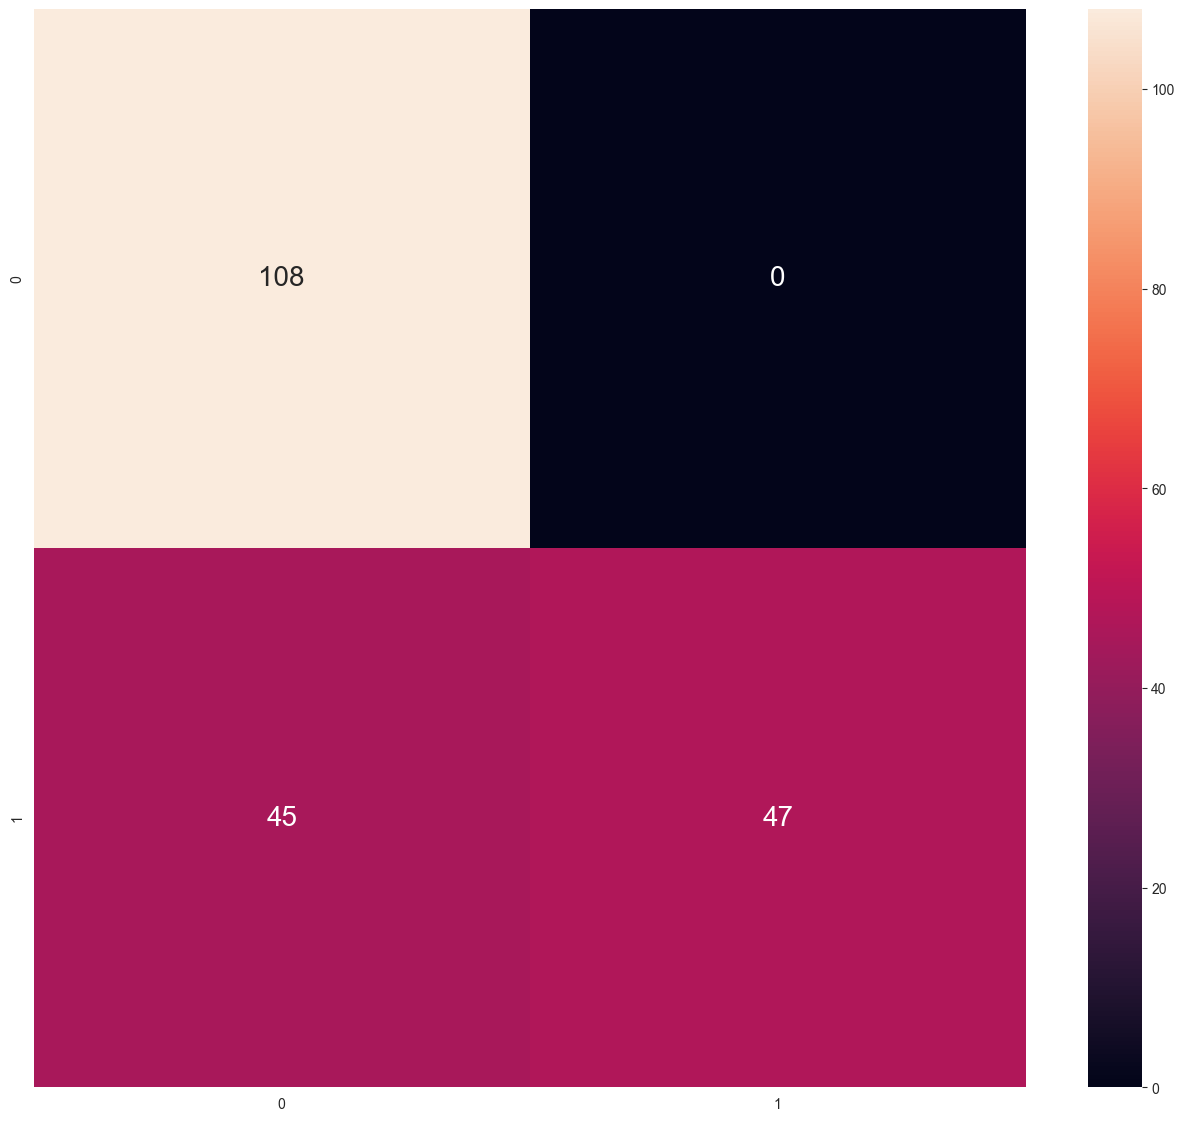

In [25]:
y = model.predict(xt)

# import seaborn as sns
# sns.catplot(x=x[:, 0], y=model.labels_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(x_test.iloc[:, 0], np.where(y > 0.5, 1, 0))
print(cm)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 20})

plt.show()

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.labels_)
# disp.plot()
# plt.show()